In [1]:
import h5py
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches
import sys
import shutil
import glob
import optparse
import os
import json
import pandas as pd
import numpy as np
import pylab as pl
import scipy.stats as stats
import seaborn as sns
sys.path.append('/n/coxfs01/cechavarria/repos/2p-pipeline/')

In [2]:
class struct: pass

optsE = struct()
optsE.rootdir = '/n/coxfs01/2p-data'
optsE.animalid = 'JC097'
optsE.session = '20190621'
optsE.acquisition = 'FOV1_zoom4p0x'
traceid = 'traces001_s2p'
run = 'scenes_combined'


#% Set up paths:    
acquisition_dir = os.path.join(optsE.rootdir, optsE.animalid, optsE.session, optsE.acquisition)
if 'combined' in run:
    traceid_dir = os.path.join(acquisition_dir, run,'traces',traceid)
else:
    traceid_dir = util.get_traceid_from_acquisition(acquisition_dir, run, traceid)
run_dir = traceid_dir.split('/traces')[0]
trace_arrays_dir = os.path.join(traceid_dir,'files')
paradigm_dir = os.path.join(acquisition_dir, run, 'paradigm')


responses_dir = os.path.join(acquisition_dir, run,'responses',traceid)
data_array_dir = os.path.join(responses_dir, 'data_arrays')

    
if not os.path.exists(os.path.join(responses_dir,'figures')):
    os.makedirs(os.path.join(responses_dir,'figures'))

In [4]:
#open_tilf
resp_array_fn = 'trial_response_array.hdf5'
resp_array_filepath = os.path.join(data_array_dir,'files' , resp_array_fn)
resp_grp = h5py.File(resp_array_filepath, 'r')

In [5]:
if 's2p_cell_rois' in resp_grp.attrs.keys():
    cell_rois = resp_grp.attrs['s2p_cell_rois']
else:
    cell_rois = np.arange(nrois)
config_img = resp_grp.attrs['config_img'].astype('int')
config_cond = resp_grp.attrs['config_cond'].astype('int')

curr_slice = 'Slice01'#hard,coding for now

In [6]:
#unpack
response_matrix_df_f = np.array(resp_grp['/'.join([curr_slice, 'responses' ,'df_f'])])


In [20]:
#consider only cell ROIs
response_matrix = response_matrix_df_f[:,:,cell_rois]
ntrials, nstims, nrois = response_matrix.shape

In [63]:
split_size_list = np.arange(14)+1
nreps = 10000

R_matrix = np.zeros((split_size_list.size,nreps))

for split_idx,split_size in enumerate(split_size_list):

    for rep in range(nreps):
        rand_trials = np.random.permutation(ntrials)
        half1 = response_matrix[rand_trials[0:split_size]]
        half2 = response_matrix[rand_trials[split_size:(2*split_size)]]


        half1_mean = np.squeeze(np.mean(half1,0)).flatten()
        half2_mean = np.squeeze(np.mean(half2,0)).flatten()

        R_mat = np.corrcoef(half1_mean,half2_mean)
        R_matrix[split_idx,rep] = R_mat[0,1]


In [64]:
R_mean = np.mean(R_matrix,1)
R_se = np.true_divide(np.nanstd(R_matrix,1),np.sqrt(nreps))

<ErrorbarContainer object of 3 artists>

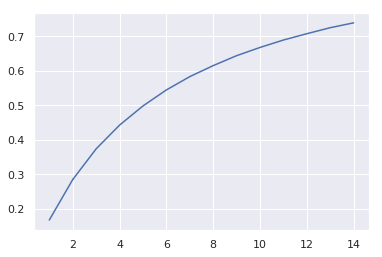

In [71]:
plt.errorbar(split_size_list,R_mean,yerr=R_se)